<a href="https://colab.research.google.com/github/IvanEFibiger/BDyML/blob/main/Laboratorio_III_Clustering_de_zonas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar Librerias

In [24]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Leer Dataframe

###Dataframe

In [25]:
df = pd.read_csv('/content/drive/MyDrive/Crimenes.csv')

df.head()

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### Agregamos la columna 'Total', que es la suma de los crímenes cometidos por estado, para tener una noción de cuántos delitos en total se cometieron.

In [26]:
df['Total'] = df['Asesinatos'] + df['Asaltos'] + df['Violaciones']

df

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Total
0,Alabama,13.2,236,58,21.2,270.4
1,Alaska,10.0,263,48,44.5,317.5
2,Arizona,8.1,294,80,31.0,333.1
3,Arkansas,8.8,190,50,19.5,218.3
4,California,9.0,276,91,40.6,325.6
5,Colorado,7.9,204,78,38.7,250.6
6,Connecticut,3.3,110,77,11.1,124.4
7,Delaware,5.9,238,72,15.8,259.7
8,Florida,15.4,335,80,31.9,382.3
9,Georgia,17.4,211,60,25.8,254.2


Se grafica la poblacion de cada estado y la cantidad de crimenes cometidos, para tener una visual de como interactuan estas variables.

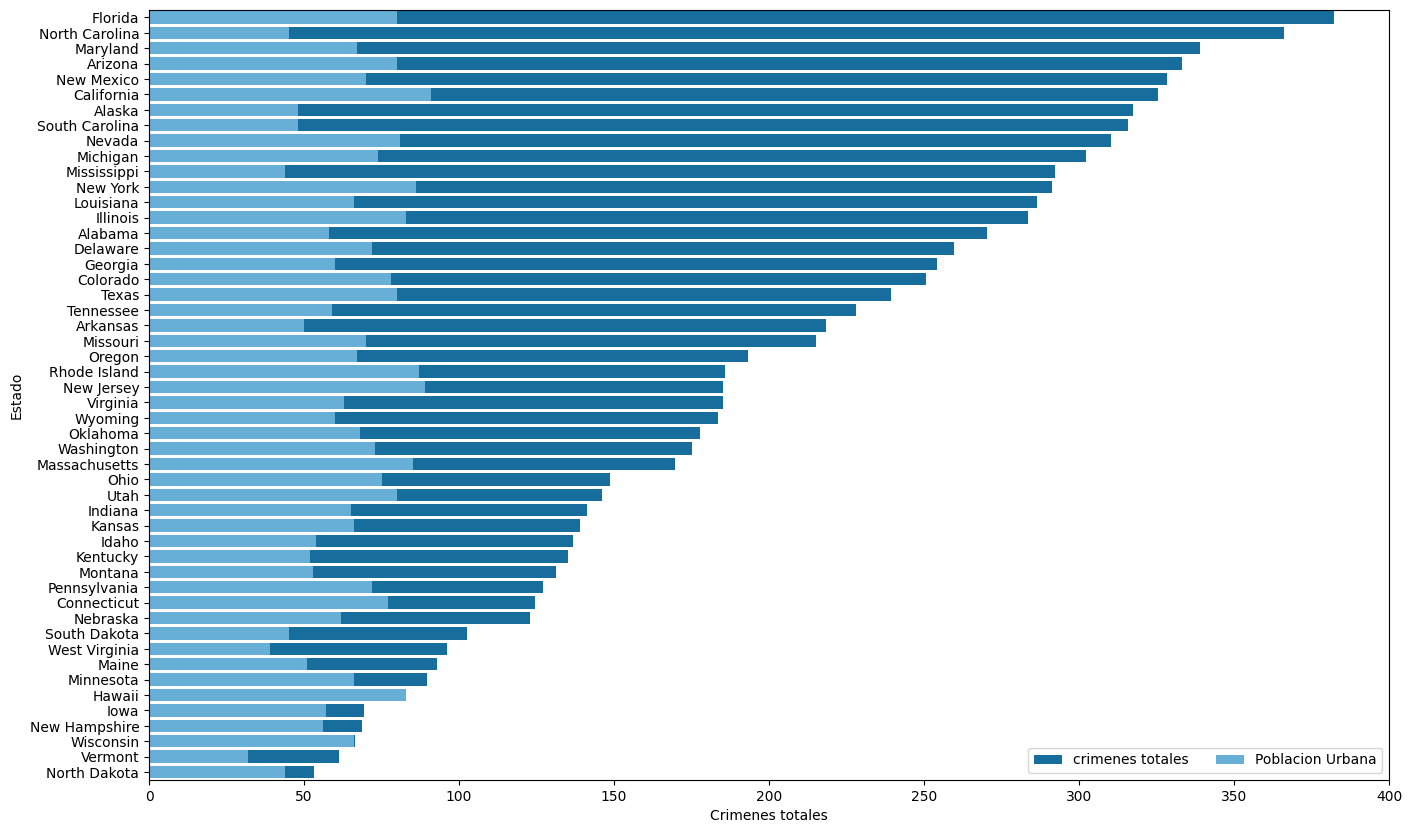

In [27]:
f, ax = plt.subplots(figsize=(16, 10))

# Load the dataset
stats = df.sort_values("Total", ascending=False)

# Plot the total. x= and y= are actual column names
sns.set_color_codes("colorblind")
sns.barplot(x="Total", y="Estado", data=stats,
            label="crimenes totales", color="b")

# Plot the population
sns.barplot(x="Poblacion Urbana", y="Estado", data=stats,
            label="Poblacion Urbana", color="c")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="Estado",
       xlabel="Crimenes totales");

Al igual que el grafico anterior nos ayudamos de un grafico de barras para poder visualizar los diferentes crimenes cometidos y el total de ellos en cada estado.

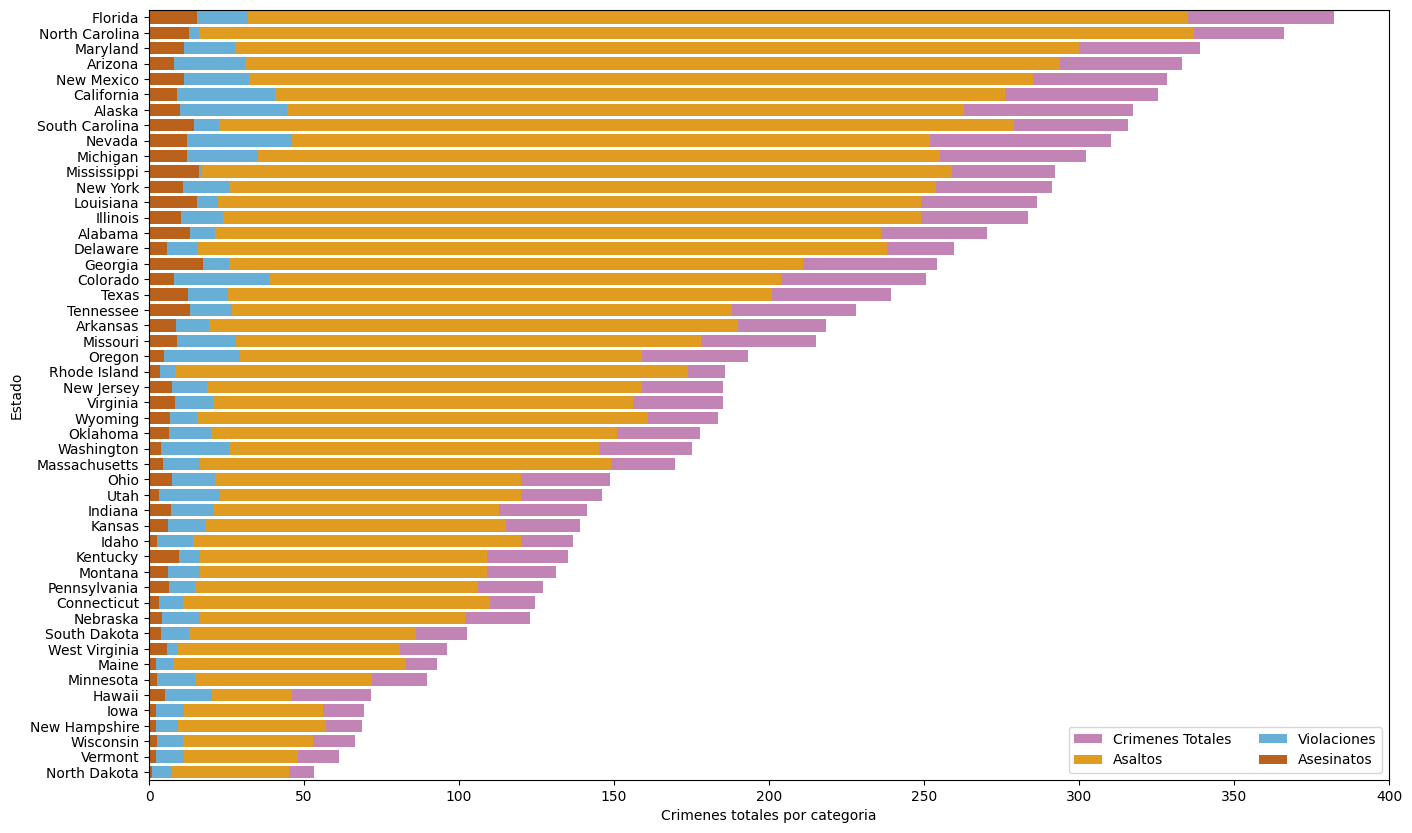

In [28]:
f, ax = plt.subplots(figsize=(16, 10))

stats = df.sort_values("Total", ascending=False)

sns.set_color_codes("colorblind")

sns.barplot(x="Total", y="Estado", data=stats,
            label="Crimenes Totales", color="m")

sns.barplot(x="Asaltos", y="Estado", data=stats,
            label="Asaltos", color="orange")

sns.barplot(x="Violaciones", y="Estado", data=stats,
            label="Violaciones", color="c")

sns.barplot(x="Asesinatos", y="Estado", data=stats,
            label="Asesinatos", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="Estado",
       xlabel="Crimenes totales por categoria");

# Análisis de clustering

In [29]:
# Seleccionamos las columnas relevantes para el análisis de clustering
X = df[['Asesinatos', 'Asaltos', 'Violaciones', 'Poblacion Urbana']]

# Normalizamos los datos utilizando StandardScaler (asegurando que todas las variables tengan la misma escala)

scaler = StandardScaler()
X_scaled = scaler.fit_transform( X )

# Inicializamos una lista para almacenar los errores de clustering
cluster_range = range( 1, 20 )
cluster_errors = []

# Iteramos sobre diferentes números de clusters y almacenamos los errores
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

# Creamos un DataFrame 'clusters_df' que contiene la información sobre los errores de clustering
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

,num_clusters,cluster_errors
0,1,200.000000
1,2,104.961633
2,3,80.088861
3,4,57.554259
4,5,50.071171
5,6,45.134536
6,7,40.649696
7,8,36.886651
8,9,31.885357
9,10,27.695051


###Gráfico de codo
Este gráfico es utilizado para determinar el número óptimo de clústeres en un análisis de clustering

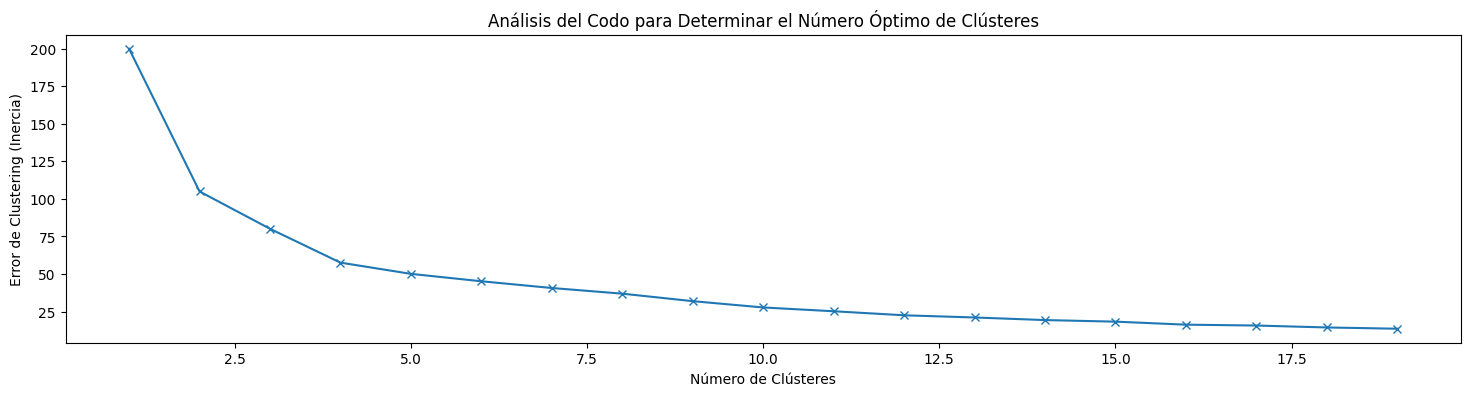

In [30]:
plt.figure(figsize=(18,4))
#El eje x representa el número de clústeres y el eje y representa los errores de clustering.Se utiliza el marcador "x" para resaltar los puntos en la curva
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "x" );
plt.xlabel('Número de Clústeres')
plt.ylabel('Error de Clustering (Inercia)')
plt.title('Análisis del Codo para Determinar el Número Óptimo de Clústeres')

plt.show()

Observamos que después de 4, la curva parece estabilizarse, por lo que elegiremos 4 clústeres

#Aplicamos el algoritmo K-Means

Utilizamos el algoritmo K-Means con 4 clústeres surgido del análisis de clustering

In [31]:
# Seleccionamos las columnas relevantes para el análisis
X = df[['Asesinatos', 'Asaltos', 'Violaciones', 'Poblacion Urbana']]

# Inicializamos y ajustamos el modelo K-Means con 4 clústeres
clusters = KMeans(4)
clusters.fit( X )

# Obtenemos las coordenadas de los centroides de los clústeres
clusters.cluster_centers_

# Obtenemos las etiquetas de clúster asignadas a cada fila de los datos
clusters.labels_

# Asignamos las etiquetas de clústeres al DataFrame original
df['Crime_clusters'] = clusters.labels_

df.head()
df.sort_values(by=['Crime_clusters'],ascending = True)
X.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Asesinatos,Asaltos,Violaciones,Poblacion Urbana
0,13.2,236,21.2,58
1,10.0,263,44.5,48
2,8.1,294,31.0,80
3,8.8,190,19.5,50
4,9.0,276,40.6,91


#Gráficos





Utilizamos un Gráfico de dispersión para visualizar la relación entre las variables 'Poblacion Urbana' y 'Total', usando colores para representar los diferentes clusters generados por el modelo.

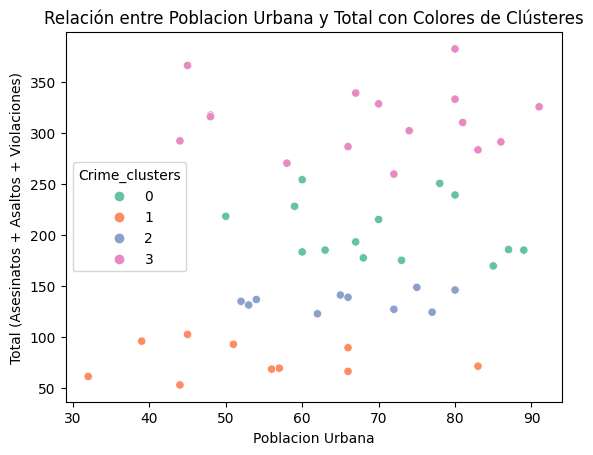

In [32]:
sns.scatterplot(x='Poblacion Urbana', y='Total', hue='Crime_clusters', data=df, palette='Set2')

# Añadimos etiquetas y título
plt.xlabel('Poblacion Urbana')
plt.ylabel('Total (Asesinatos + Asaltos + Violaciones)')
plt.title('Relación entre Poblacion Urbana y Total con Colores de Clústeres')


plt.show()

Observamos que no hay una correlación entre el total de crímenes y el tamaño de la población urbana





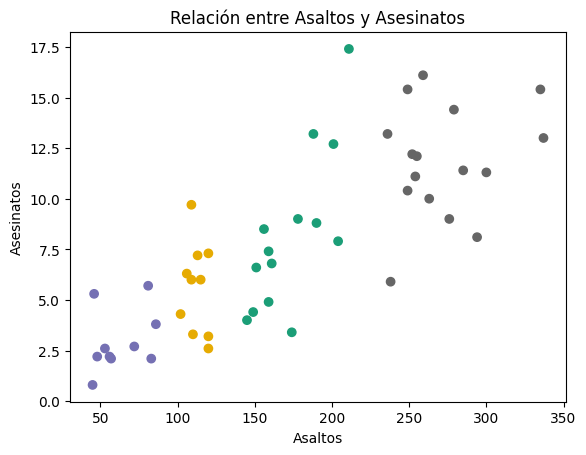

In [33]:
plt.scatter(x=df['Asaltos'], y=df['Asesinatos'], c=df['Crime_clusters'], cmap='Dark2')

# Añadimos etiquetas y título
plt.xlabel('Asaltos')
plt.ylabel('Asesinatos')
plt.title('Relación entre Asaltos y Asesinatos')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


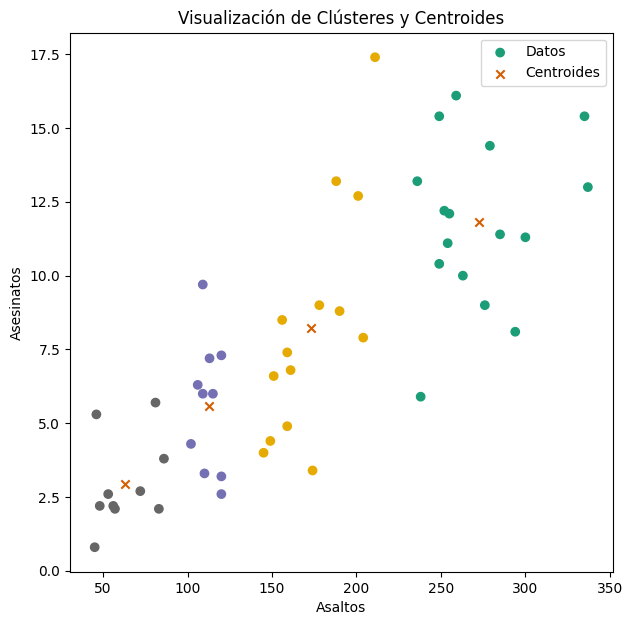

In [34]:
data = X
clusters = KMeans(4)
clusters.fit(X)

plt.figure(figsize=(7, 7))
centers = np.array(clusters.cluster_centers_)

# Aplicamos gráfico de dispersión
plt.scatter(data.iloc[:, 1], data.iloc[:, 0], c=clusters.labels_, cmap='Dark2', label='Datos')

# Colocamos los centroides
plt.scatter(centers[:, 1], centers[:, 0], marker="x", color='r', label='Centroides')

# añadimos etiquetas y título
plt.xlabel('Asaltos')
plt.ylabel('Asesinatos')
plt.title('Visualización de Clústeres y Centroides')

# añadimos leyenda
plt.legend()

# Mostramos el gráfico
plt.show()


Al analizar las variables de Asesinatos y Asaltos, se revela una conexión más evidente entre ellas, aunque se pueden distinguir algunos valores atípicos.

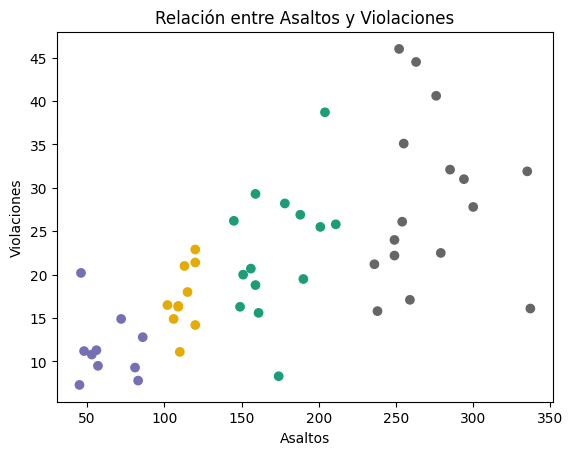

In [35]:
plt.scatter(x=df['Asaltos'], y=df['Violaciones'], c=df['Crime_clusters'], cmap='Dark2')

plt.xlabel('Asaltos')
plt.ylabel('Violaciones')
plt.title('Relación entre Asaltos y Violaciones')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


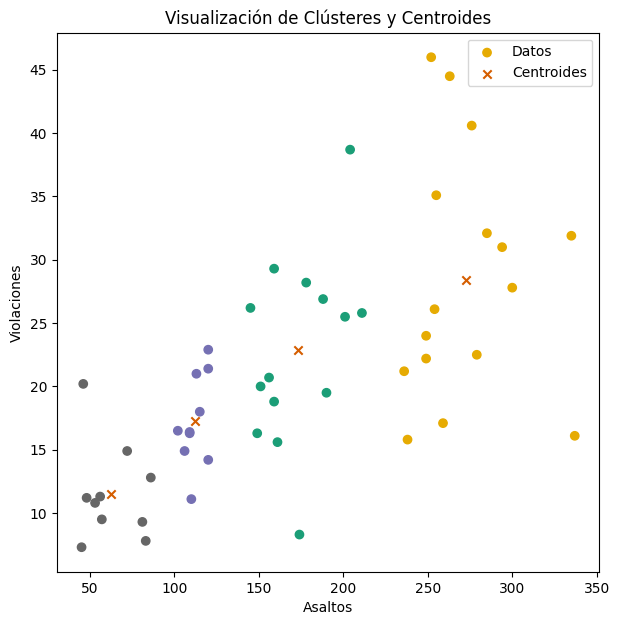

In [36]:
data = X
clusters = KMeans(4)
clusters.fit(X)

plt.figure(figsize=(7, 7))
centers = np.array(clusters.cluster_centers_)

plt.scatter(data.iloc[:, 1], data.iloc[:, 2], c=clusters.labels_, cmap='Dark2', label='Datos')

plt.scatter(centers[:, 1], centers[:, 2], marker="x", color='r', label='Centroides')

plt.xlabel('Asaltos')
plt.ylabel('Violaciones')
plt.title('Visualización de Clústeres y Centroides')

plt.legend()

plt.show()


Al igual que ocurre con los asesinatos y los asaltos, las tasas de violaciones y asaltos muestran una correlación bastante evidente.

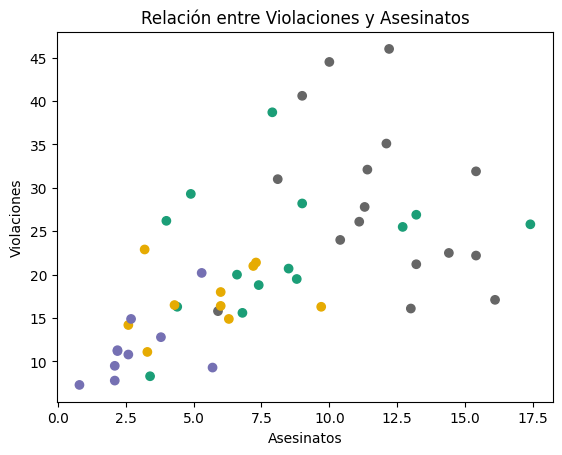

In [37]:
plt.scatter(x=df['Asesinatos'], y=df['Violaciones'], c=df['Crime_clusters'], cmap='Dark2')

plt.xlabel('Asesinatos')
plt.ylabel('Violaciones')
plt.title('Relación entre Violaciones y Asesinatos')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


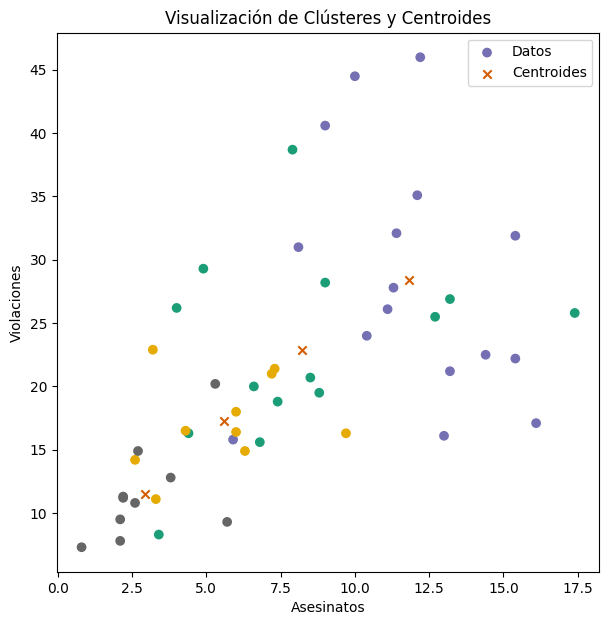

In [38]:
data = X
clusters = KMeans(4)
clusters.fit(X)

plt.figure(figsize=(7, 7))
centers = np.array(clusters.cluster_centers_)

plt.scatter(data.iloc[:, 0], data.iloc[:, 2], c=clusters.labels_, cmap='Dark2', label='Datos')

plt.scatter(centers[:, 0], centers[:, 2], marker="x", color='r', label='Centroides')

plt.xlabel('Asesinatos')
plt.ylabel('Violaciones')
plt.title('Visualización de Clústeres y Centroides')

plt.legend()

plt.show()

A diferencia de los casos anteriores, la correlación entre violaciones y asesinatos no parece ser tan clara.

# Dividir en alta o baja peligrosidad segun el cluster correspondiente

In [39]:
stats = df.sort_values("Crime_clusters", ascending=True)
df_total= pd.DataFrame(stats)

df_total.head()

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Total,Crime_clusters
24,Missouri,9.0,178,70,28.2,215.2,0
46,Washington,4.0,145,73,26.2,175.2,0
45,Virginia,8.5,156,63,20.7,185.2,0
42,Texas,12.7,201,80,25.5,239.2,0
41,Tennessee,13.2,188,59,26.9,228.1,0


In [40]:
# Obtenemos los nombres de los clusters
cluster_names = df_total['Crime_clusters']

# Cramos la columna 'Cluster_names' en el DataFrame
df_total['Cluster_names'] = cluster_names

# Identificamos los clusters con mayor peligrosidad
most_dangerous_clusters = [0, 1]

# Asignamos nombres a los clústeres según su peligrosidad
df_total['Cluster_names'] = df_total['Cluster_names'].apply(lambda x: "Alta peligrosidad" if x in most_dangerous_clusters else "Baja peligrosidad")

# mostramos los resultados
df_total

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Total,Crime_clusters,Cluster_names
24,Missouri,9.0,178,70,28.2,215.2,0,Alta peligrosidad
46,Washington,4.0,145,73,26.2,175.2,0,Alta peligrosidad
45,Virginia,8.5,156,63,20.7,185.2,0,Alta peligrosidad
42,Texas,12.7,201,80,25.5,239.2,0,Alta peligrosidad
41,Tennessee,13.2,188,59,26.9,228.1,0,Alta peligrosidad
38,Rhode Island,3.4,174,87,8.3,185.7,0,Alta peligrosidad
36,Oregon,4.9,159,67,29.3,193.2,0,Alta peligrosidad
35,Oklahoma,6.6,151,68,20.0,177.6,0,Alta peligrosidad
29,New Jersey,7.4,159,89,18.8,185.2,0,Alta peligrosidad
20,Massachusetts,4.4,149,85,16.3,169.7,0,Alta peligrosidad


# Mostrar el grafico que divide los estados segun su peligrosidad

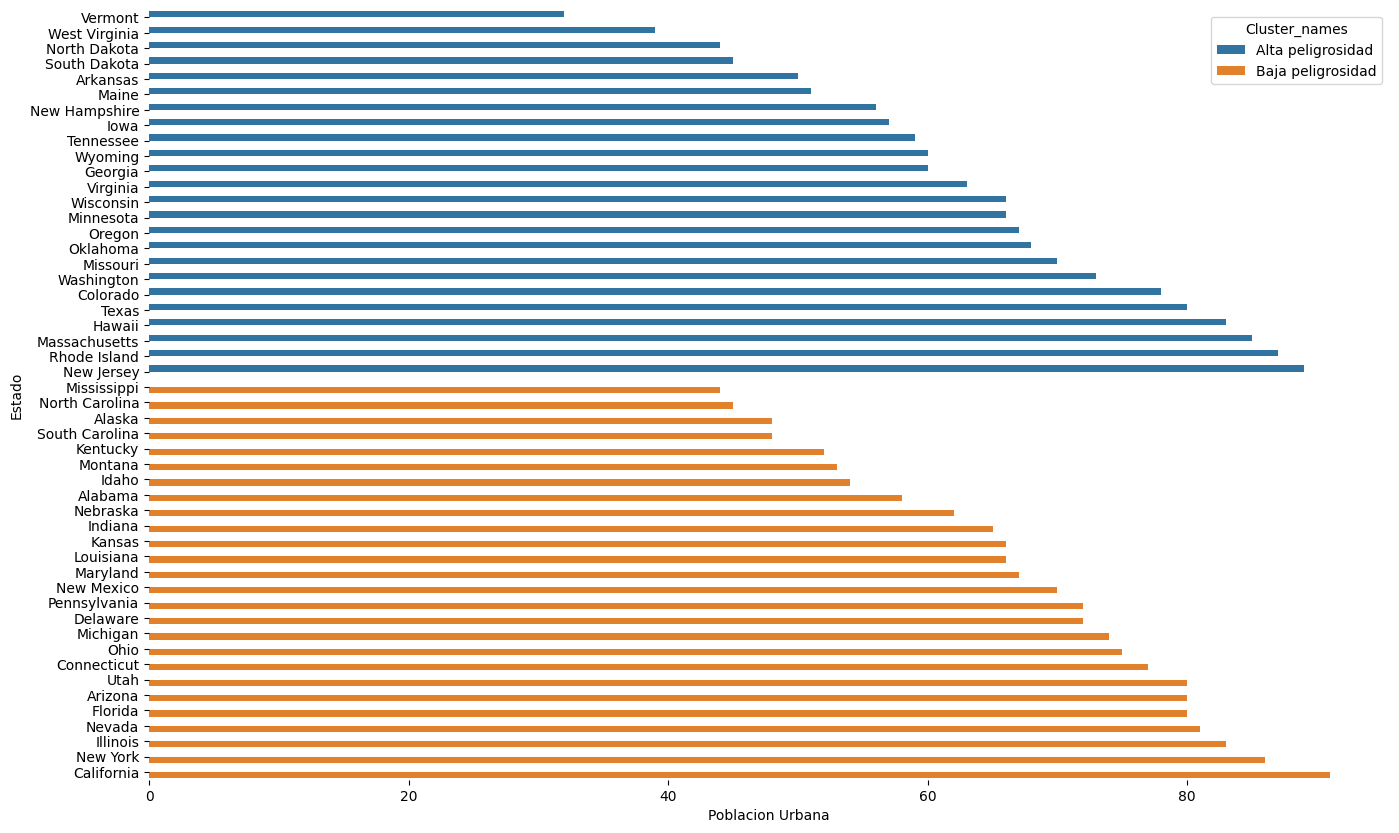

In [41]:
# Creamos una figura y ejes para el gráfico, estableciendo el tamaño
f, ax = plt.subplots(figsize=(16, 10))

# Ordenamos los datos según el nombre del clúster y la población urbana de manera ascendente
stats = df_total.sort_values(["Cluster_names", "Poblacion Urbana"], ascending=True)

# Establecemos los colores para los gráficos de barras
sns.set_color_codes("dark")

# Creamos un gráfico de barras apiladas.
sns.barplot(y="Estado", x="Poblacion Urbana", hue="Cluster_names", data=stats, dodge=True)

# Eliminamos los ejes izquierdo y inferior del gráfico
sns.despine(left=True, bottom=True)

# Agregamos una leyenda al gráfico con un título para los nombres de los clústeres, ubicada en la esquina superior derecha
plt.legend(title="Cluster_names", loc="upper right")

# Mostramos el gráfico
plt.show()

# Conclusión

No existen diferencias claras y concluyentes para este conjunto de datos, teniendo en cuenta las dos categorias solicitadas(alta y baja peligrosidad), y las variables disponibles para el análisis.

Por ejemplo, una gran población urbana no conduce automáticamente a tasas de criminalidad más altas. New Jersey es una de las poblaciones urbanas mas grandes, sin embargo, su tasa de criminalidad es mas baja que Mississippi, que es un Estado mas pequeño en cantidad de población urbana pero con alto índice de criminalidad.

Deberían contemplarse otros factores como la condición socio-económica, el acceso a estupefacientes o bebidas alcoholicas, el nivel educativo y demás para poder realizar un análisis más eficiente